# Q1:

### Importing Libraries and Reading Data

In [430]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [372]:
df = pd.read_csv("Data.csv")

In [397]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


#### AOV check

In [389]:
df['order_amount'].sum()/len(df['order_id'])

3145.128

#### Plotting Data to Check for Outliers

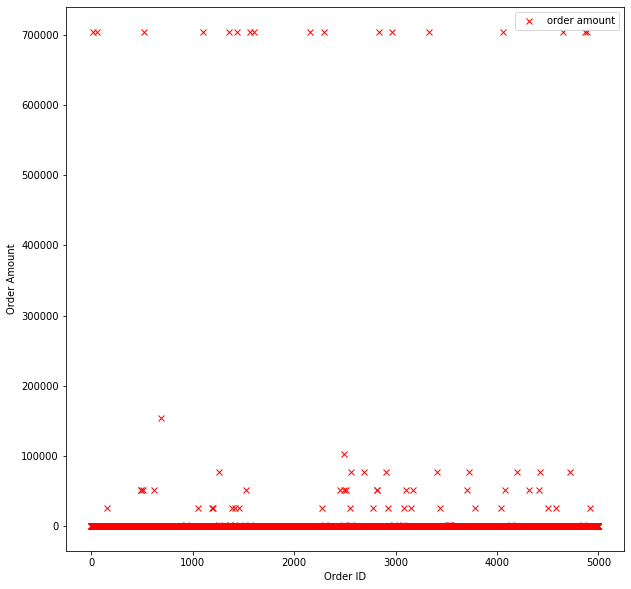

In [395]:
plt.figure(figsize=(10,10)); 
plt.plot(df.order_id.values,df.order_amount.values,'rx');
plt.legend(["order amount"], loc = 'best')
plt.xlabel('Order ID')
plt.ylabel("Order Amount");

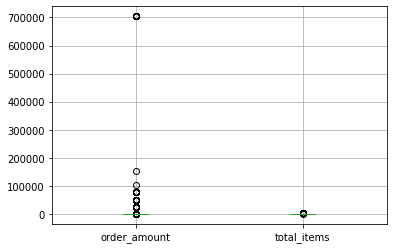

In [446]:
df.boxplot(column = ['order_amount','total_items']);

There are far too many Outliers in this case but we need to check if they are an outlier or there are just a result of massive bulk order. We also check if they are specific payment related issues

In [433]:
cash = df[df['payment_method'] == 'cash']  
credit = df[df['payment_method'] == 'credit_card']  
debit = df[df['payment_method'] == 'debit']  

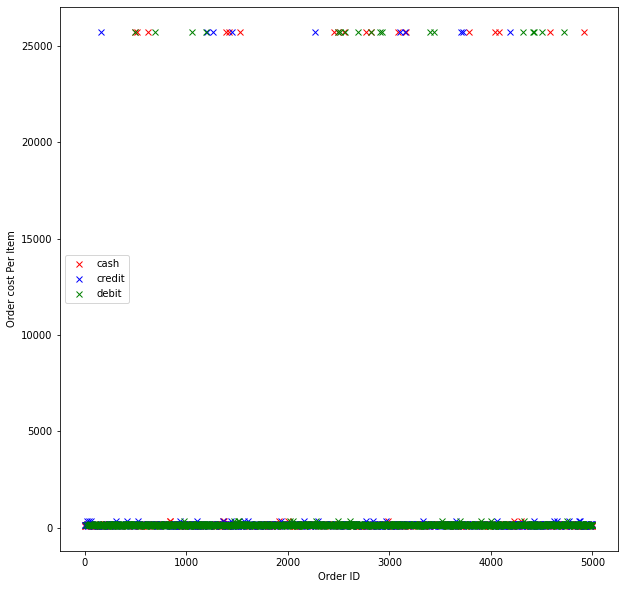

In [435]:
plt.figure(figsize=(10,10)); 
plt.plot(cash.order_id.values,cash.order_amount.values/cash.total_items.values , 'rx');
plt.plot(credit.order_id.values,credit.order_amount.values/credit.total_items.values , 'bx');
plt.plot(debit.order_id.values,debit.order_amount.values/debit.total_items.values , 'gx');
plt.legend(["cash",'credit','debit'], loc = 'best')
plt.xlabel('Order ID')
plt.ylabel("Order cost Per Item");

Now the number of outliers have gone down, we have come to the conclusion that either a certain shop is selling the same boots on a way larger price. To Confirm this instead of order_ID we plot shop_ID

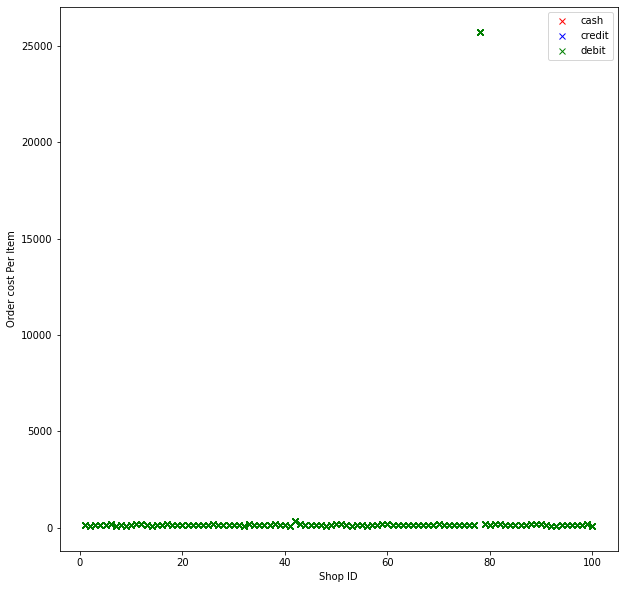

In [448]:
plt.figure(figsize=(10,10)); 
plt.plot(cash.shop_id.values,cash.order_amount.values/cash.total_items.values, 'rx');
plt.plot(credit.shop_id.values,credit.order_amount.values/credit.total_items.values , 'bx');
plt.plot(debit.shop_id.values,debit.order_amount.values/debit.total_items.values , 'gx');
plt.legend(["cash",'credit','debit'], loc = 'best')
plt.xlabel('Shop ID')
plt.ylabel("Order cost Per Item");

Hence We can see it is a single shop which is responsible for such outliers by selling the shoes way over price. Lets Try to Confirm this by locating the shop in the database

In [452]:
df[df['shop_id'] == 78]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57
490,491,78,936,51450,2,debit,2017-03-26 17:08:19
493,494,78,983,51450,2,cash,2017-03-16 21:39:35
511,512,78,967,51450,2,cash,2017-03-09 7:23:14
617,618,78,760,51450,2,cash,2017-03-18 11:18:42
691,692,78,878,154350,6,debit,2017-03-27 22:51:43
1056,1057,78,800,25725,1,debit,2017-03-15 10:16:45
1193,1194,78,944,25725,1,debit,2017-03-16 16:38:26
1204,1205,78,970,25725,1,credit_card,2017-03-17 22:32:21
1259,1260,78,775,77175,3,credit_card,2017-03-27 9:27:20


And there is our culprit who is responsible for the outliers now moving on the more robust ways to evaluate this. 

### Better Ways To Evaluate

**Using Amount per Item:**  

Since there can be bulk orders which may not be correctly evaluted by AOV but we may still be prone to overpriced items. But our Answer will still be far more Robust that AOV 


The Metric we will use is **Amount per Item**

In [455]:
Amount_per_Item = df['order_amount'].sum()/df['total_items'].sum()

In [458]:
print(round(Amount_per_Item,2))

357.92


The Value is: **357.92**